In [1]:
from pgmpy.utils import get_example_model
from pgmpy.inference import VariableElimination
from timeit import default_timer
import math
import matplotlib.pyplot as plt
import numpy as np
from pgmpy.inference import ApproxInference
from pgmpy.factors.discrete import State
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import BayesianModelSampling
import pandas as pd
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import ExpectationMaximization as EM

4.1

(a)

In [2]:
task = [('earthquake','JohnCalls'),('survey','T'),('asia','dysp'),('sachs','Akt'),
('child','LowerBodyO2'),('insurance','PropCost'),('alarm','BP'),('hailfinder','R5Fcst')]

In [3]:
num_nodes=[]
duration = []
num_param = [10,21,18,178,230,984,509,2656]
for model_name, var in task:
    model = get_example_model(model_name)
    num_nodes.append(len(model.nodes()))
    infer = VariableElimination(model)
    start = default_timer()
    q=infer.query(variables=[var])
    end = default_timer()
    duration.append(math.log((end-start)))



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

[Text(0.5, 0, 'Number of parameters')]

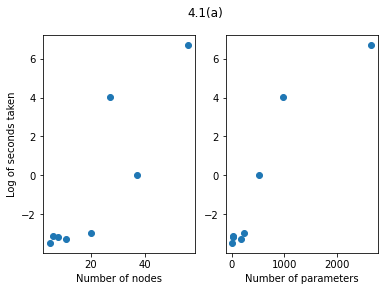

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('4.1(a)')
ax1.scatter(num_nodes, duration)
ax1.set(xlabel='Number of nodes', ylabel='Log of seconds taken')
ax2.scatter(num_param, duration)
ax2.set(xlabel='Number of parameters')

We can see that the log of second taken has quadratic relation with number of nodes and log of second taken has linear relation with number of parameters. So exact inference is generally exponential in Bayes net size.

(b)

In [38]:
num_nodes=[]
duration = []
num_param = [10,21,18,178,230,984,509,2656]
for model_name, var in task:
    model = get_example_model(model_name)
    num_nodes.append(len(model.nodes()))
    infer = VariableElimination(model)
    start = default_timer()
    q=infer.query(variables=[var],elimination_order='MinNeighbors')
    end = default_timer()
    duration.append(math.log((end-start)))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

[Text(0.5, 0, 'Number of parameters')]

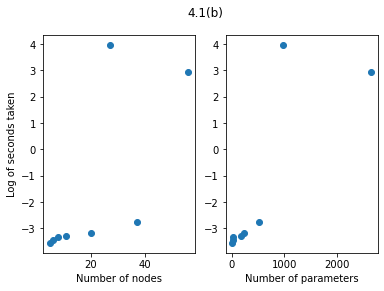

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('4.1(b)')
ax1.scatter(num_nodes, duration)
ax1.set(xlabel='Number of nodes', ylabel='Log of seconds taken')
ax2.scatter(num_param, duration)
ax2.set(xlabel='Number of parameters')

We can see that in plot (b), each point has less log time taken. So elimination order is important to the efficiency of inference. If we can find a good elimination order, we can have smaller size of tables during the calculation, which can save us a lot of time and memery.

4.2

In [41]:
insurance_model = get_example_model('insurance')

In [42]:
insurance_infer = VariableElimination(insurance_model)

In [43]:
q=insurance_infer.query(variables=['PropCost'])
print(q)

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

+-----------------------+-----------------+
| PropCost              |   phi(PropCost) |
+=======================+=================+
| PropCost(Thousand)    |          0.5629 |
+-----------------------+-----------------+
| PropCost(TenThou)     |          0.3152 |
+-----------------------+-----------------+
| PropCost(HundredThou) |          0.1051 |
+-----------------------+-----------------+
| PropCost(Million)     |          0.0168 |
+-----------------------+-----------------+


In [50]:
prop_values = q.values
prop_domains = q.state_names['PropCost']

In [57]:
prop_values,prop_domains

(array([0.56294559, 0.31518759, 0.10507029, 0.01679652]),
 ['Thousand', 'TenThou', 'HundredThou', 'Million'])

(a)

In [ ]:
insurance_approxinfer = ApproxInference(insurance_model)

num_samples =[x for x in range(100, 10001, 100)]
errors = []
duration = []

for n in range(100, 10001, 100):
    start = default_timer()
    q=insurance_approxinfer.query(variables=['PropCost'],n_samples=n)
    end = default_timer()
    duration.append((end-start))
    approx_values = np.array([q.values[idx] for idx in [q.name_to_no['PropCost'][name] for name in prop_domains]])
    errors.append(np.linalg.norm(np.subtract(approx_values,prop_values)))


[Text(0.5, 0, 'Number of samples'), Text(0, 0.5, 'Error')]

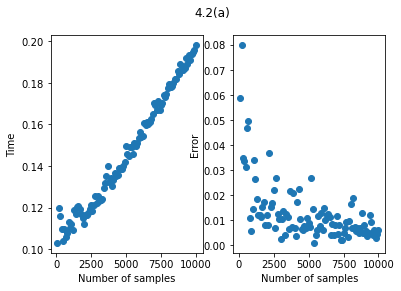

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('4.2(a)')
ax1.scatter(num_samples, duration)
ax1.set(xlabel='Number of samples', ylabel='Time')
ax2.scatter(num_samples, errors)
ax2.set(xlabel='Number of samples', ylabel='Error')

(b)
Computational complexity has positive linear relation with number of samples. Using sampling has a faster speed than computing exact inference but it has relative large error if the sample size is small. After 7500 number of samples the error stop improving. The average error to the exact inference is around 0.005 after 7500 number of samples.

(c)

In [98]:
all_evidence = [State('Age','Adult'), State('DrivHist','Zero'), State('VehicleYear','Current'),
State('ThisCarDam','None'), State('MakeModel','Luxury'), State('HomeBase','City'),
State('Cushioning','Good'), State('Airbag','True'), State('AntiTheft','True')]


In [109]:
infer = BayesianModelSampling(insurance_model)
num_evidence = []
reject_duration = []
like_duration = []
avg_weight = []
for i in range(1, len(all_evidence)+1,1):
    evidences = all_evidence[:i]
    num_evidence.append(len(evidences))
    start = default_timer()
    reject_result = infer.rejection_sample(evidence=evidences, size=100,show_progress=False)
    end = default_timer()
    reject_duration.append(end-start)
    start = default_timer()
    like_result = infer.likelihood_weighted_sample(evidence=evidences, size=100, show_progress=False)
    end = default_timer()
    like_duration.append(end-start)
    avg_weight.append(np.mean(like_result._weight))


C:\Users\David\anaconda3\lib\site-packages\pgmpy\sampling\Sampling.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled = sampled.append(_sampled).iloc[:size, :]
C:\Users\David\anaconda3\lib\site-packages\pgmpy\sampling\Sampling.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled = sampled.append(_sampled).iloc[:size, :]
C:\Users\David\anaconda3\lib\site-packages\pgmpy\sampling\Sampling.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled = sampled.append(_sampled).iloc[:size, :]
C:\Users\David\anaconda3\lib\site-packages\pgmpy\sampling\Sampling.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled = 

[Text(0.5, 15.0, 'Number of evidences'),
 Text(263.3294117647059, 0.5, 'Average sample weight')]

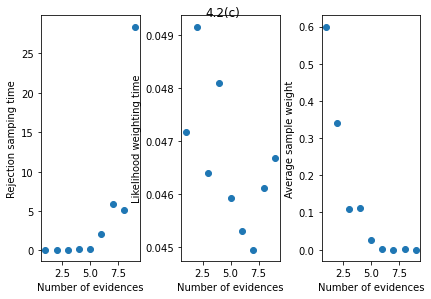

In [112]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.tight_layout()
fig.suptitle('4.2(c)')
ax1.scatter(num_evidence, reject_duration)
ax1.set(xlabel='Number of evidences', ylabel='Rejection samping time')
ax2.scatter(num_evidence, like_duration)
ax2.set(xlabel='Number of evidences', ylabel='Likelihood weighting time')
ax3.scatter(num_evidence, avg_weight)
ax3.set(xlabel='Number of evidences', ylabel='Average sample weight')

(d)
For rejection sampling, the time needed to perform sampling increase exponentially with the number of evidence. Because if the number of evidences increase, we have to reject a lot of sample to meet the requirement of observed evidence, so the time will increase a lot. For likelihood weighting, the time needed to perform sampling are almost the same regardless of the number of evidence. Because every sample generated meet the requirements of observed evidence and we will accept them all, so we spent almost the time for each evidence set. The average sample weight decrease with the number of evidence. Because more evidence means we have to times more p(e|parent(e)) in weight calculation, and they are all less than 1. So weights will approach 0 if more evidences are given.

4.3

In [129]:
full_data = pd.read_csv('data/full_data.csv')
partial_data = pd.read_csv('data/partial_data.csv')

In [130]:
network = BayesianNetwork([('tampering','alarm'),('fire','alarm'),('fire','smoke'),('alarm','leaving'),('leaving','report')])

In [131]:
full_model = BayesianNetwork(ebunch=network.edges())
partial_model = BayesianNetwork(ebunch=network.edges(), latents=['tampering','fire'])

In [132]:
full_model.fit(data=full_data, estimator=MaximumLikelihoodEstimator)

In [133]:
for x in full_model.cpds:
    print(x)

+--------------+-------+
| tampering(0) | 0.986 |
+--------------+-------+
| tampering(1) | 0.014 |
+--------------+-------+
+-----------+--------------+--------------+--------------+--------------+
| fire      | fire(0)      | fire(0)      | fire(1)      | fire(1)      |
+-----------+--------------+--------------+--------------+--------------+
| tampering | tampering(0) | tampering(1) | tampering(0) | tampering(1) |
+-----------+--------------+--------------+--------------+--------------+
| alarm(0)  | 1.0          | 0.0          | 0.0          | 0.5          |
+-----------+--------------+--------------+--------------+--------------+
| alarm(1)  | 0.0          | 1.0          | 1.0          | 0.5          |
+-----------+--------------+--------------+--------------+--------------+
+------------+----------+----------+
| alarm      | alarm(0) | alarm(1) |
+------------+----------+----------+
| leaving(0) | 1.0      | 0.16     |
+------------+----------+----------+
| leaving(1) | 0.0      

In [134]:
partial_model.fit(data=partial_data,estimator=EM)

  0%|          | 0/100 [00:00<?, ?it/s]

In [128]:
for x in partial_model.cpds:
    print(x)

+--------------+---------+
| tampering(0) | 0.17221 |
+--------------+---------+
| tampering(1) | 0.82779 |
+--------------+---------+
+-----------+-----------------------+-----+---------------------+
| fire      | fire(0)               | ... | fire(1)             |
+-----------+-----------------------+-----+---------------------+
| tampering | tampering(0)          | ... | tampering(1)        |
+-----------+-----------------------+-----+---------------------+
| alarm(0)  | 0.9999897693787494    | ... | 0.29607620464556683 |
+-----------+-----------------------+-----+---------------------+
| alarm(1)  | 1.023062125059753e-05 | ... | 0.7039237953544332  |
+-----------+-----------------------+-----+---------------------+
+------------+----------+----------+
| alarm      | alarm(0) | alarm(1) |
+------------+----------+----------+
| leaving(0) | 1.0      | 0.16     |
+------------+----------+----------+
| leaving(1) | 0.0      | 0.84     |
+------------+----------+----------+
+---------+-